# Human Activity Recognition using Smartphones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading the datasets

In [2]:
train = pd.read_csv('./DataSets/Human-Activity/train.csv')
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
train.shape

(7352, 563)

In [4]:
test = pd.read_csv('./DataSets/Human-Activity/test.csv')
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [5]:
test.shape

(2947, 563)

### Cleaning the data

######  Check for Duplicates

In [6]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


#### Checking for NaN/null values

In [7]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


#### Checking for data imbalance

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

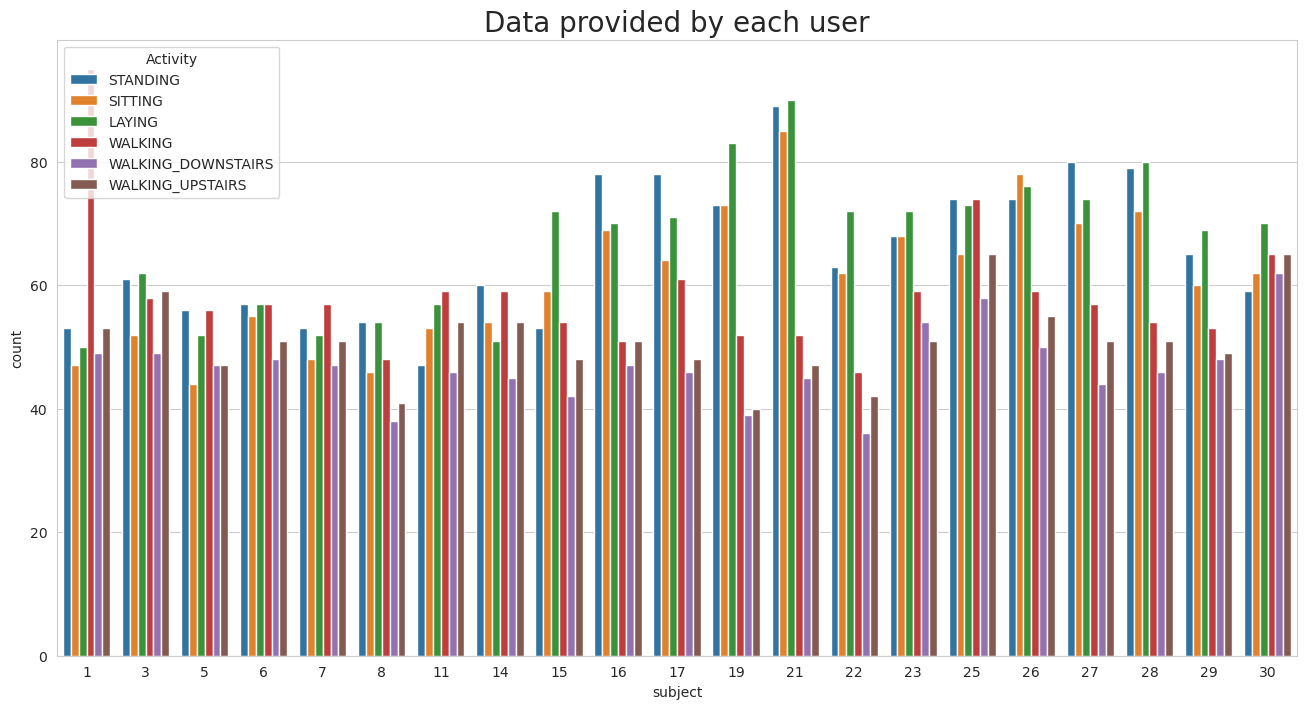

In [9]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train)
plt.show()

Inference - Dataset has same number of reading from all the subjects means there are not sygnificant difference in reading then we should not worry about it

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


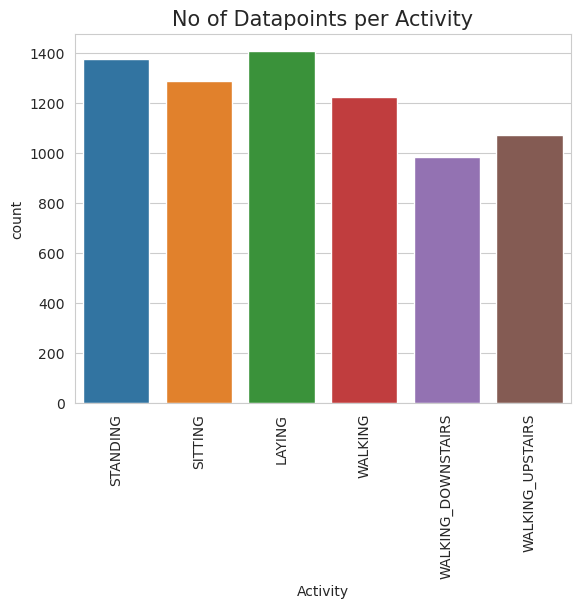

In [10]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.Activity)
plt.xticks(rotation=90)
plt.show()

Inference - There is no significant imbalance in the data

#### Analysis of the activity feature to understand how many types of activites have been performed

In [11]:
print(train.Activity.unique())
print("----------------------------------------")
print(train.Activity.value_counts())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
----------------------------------------
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64


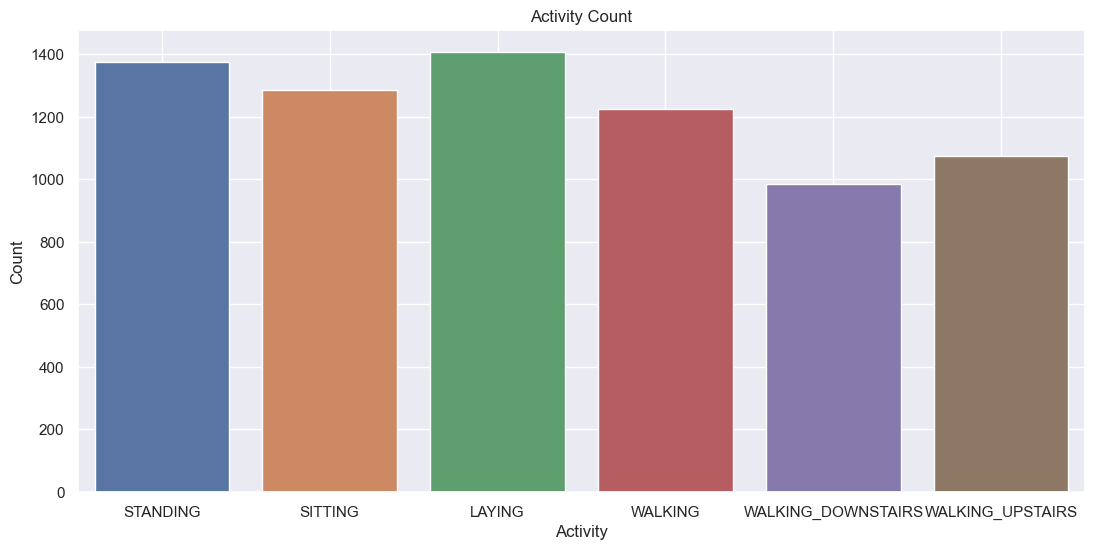

In [12]:
sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "Activity" , data = train)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)

In [13]:
pd.crosstab(train.subject, train.Activity, margins=True).style.background_gradient(cmap='autumn_r')

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
1,50,47,53,95,49,53,347
3,62,52,61,58,49,59,341
5,52,44,56,56,47,47,302
6,57,55,57,57,48,51,325
7,52,48,53,57,47,51,308
8,54,46,54,48,38,41,281
11,57,53,47,59,46,54,316
14,51,54,60,59,45,54,323
15,72,59,53,54,42,48,328


###  Cleaning the feature names for an easy understanding  

Removing the commas and brackets from the feature names 

In [14]:
columns = train.columns

columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

C:\Users\USER\AppData\Local\Temp\ipykernel_13736\3233613616.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[()]','')
C:\Users\USER\AppData\Local\Temp\ipykernel_13736\3233613616.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[-]', '')
C:\Users\USER\AppData\Local\Temp\ipykernel_13736\3233613616.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[,]','')


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

##  Exploratory Data Analysis

###  Visualization of the Stationary and Moving activities 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarni

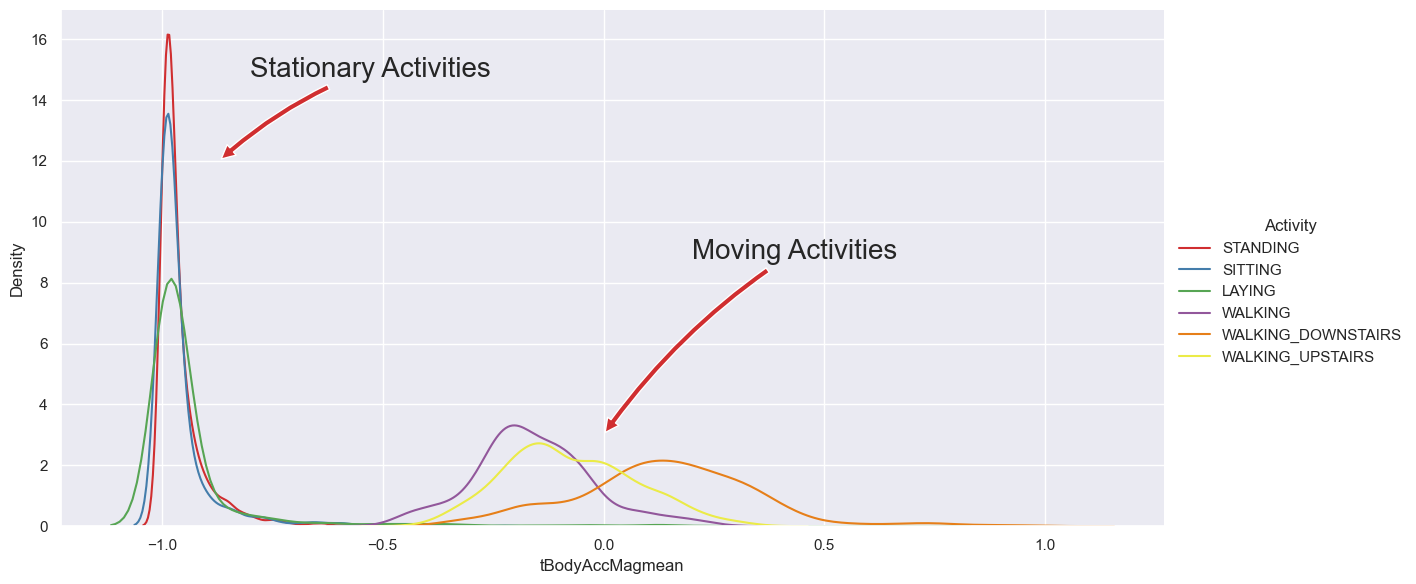

In [16]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
.add_legend()
plt.annotate("Stationary Activities", xy=(-0.87,12), xytext=(-0.8, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

### Maximizing the Static and Dynamic activities plots

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

<AxesSubplot:title={'center':'Dynamic Activities(closer view)'}, xlabel='tBodyAccMagmean', ylabel='Density'>

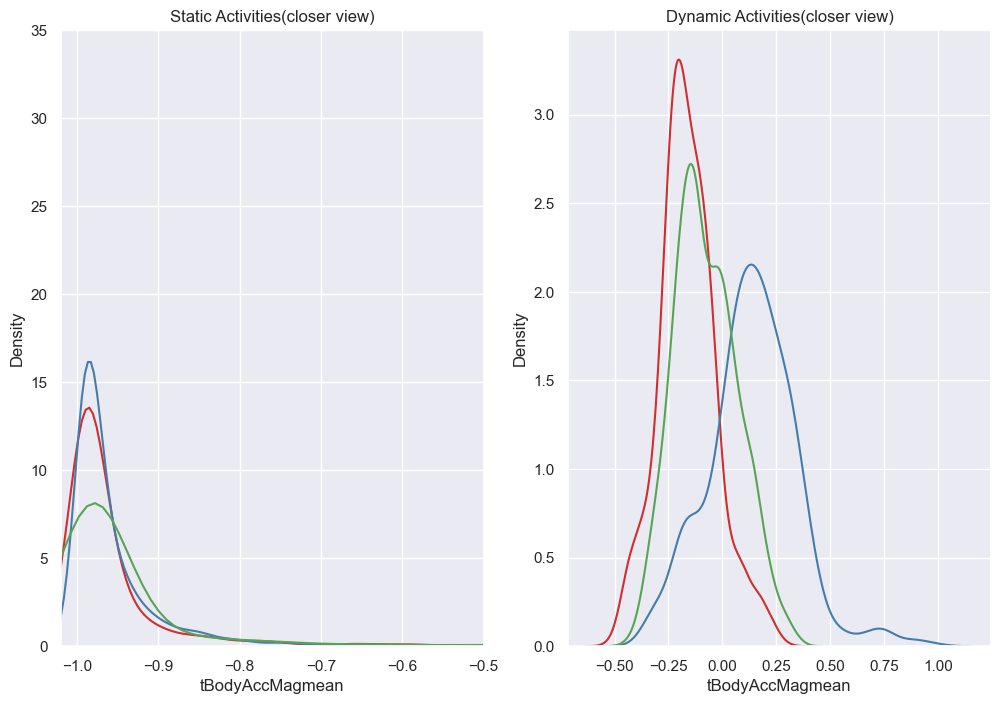

In [17]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]



plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMagmean'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMagmean'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMagmean'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMagmean'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMagmean'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'],hist = False, label = 'Laying')

### Vusualization of the magnitude of acceleration data captured by the accelerometer sensor of the smartphone

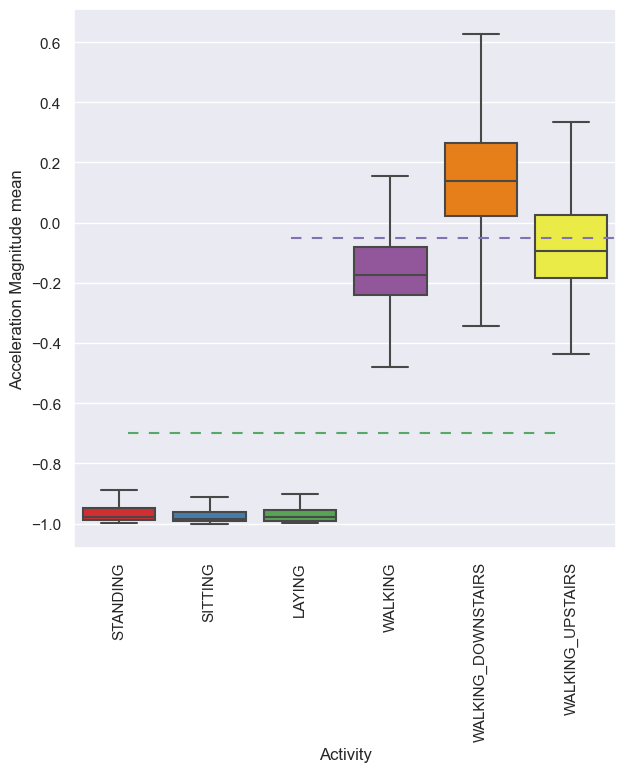

In [18]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

###### Inference
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### Visualizing the position of GravityAccelerationComponants data captured by the gyroscopic sensor of the smartphone

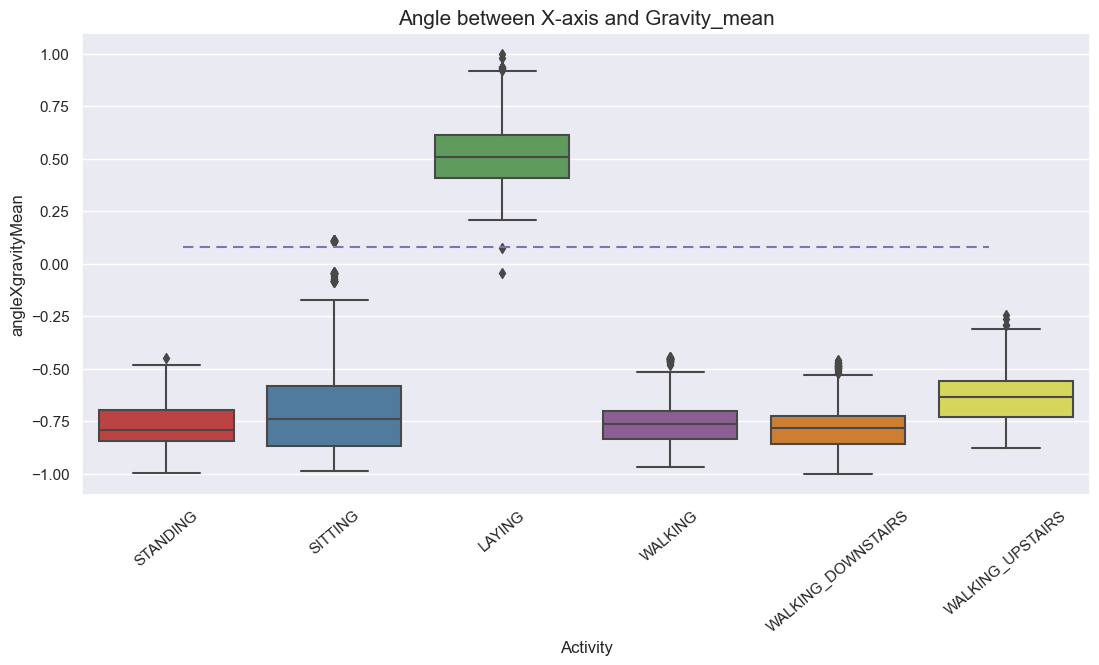

In [19]:
sns.boxplot(x='Activity', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

###### Inference
- If angleX,gravityMean > 0 then Activity is Laying.
- We can classify all datapoints belonging to Laying activity with just a single if else statement.

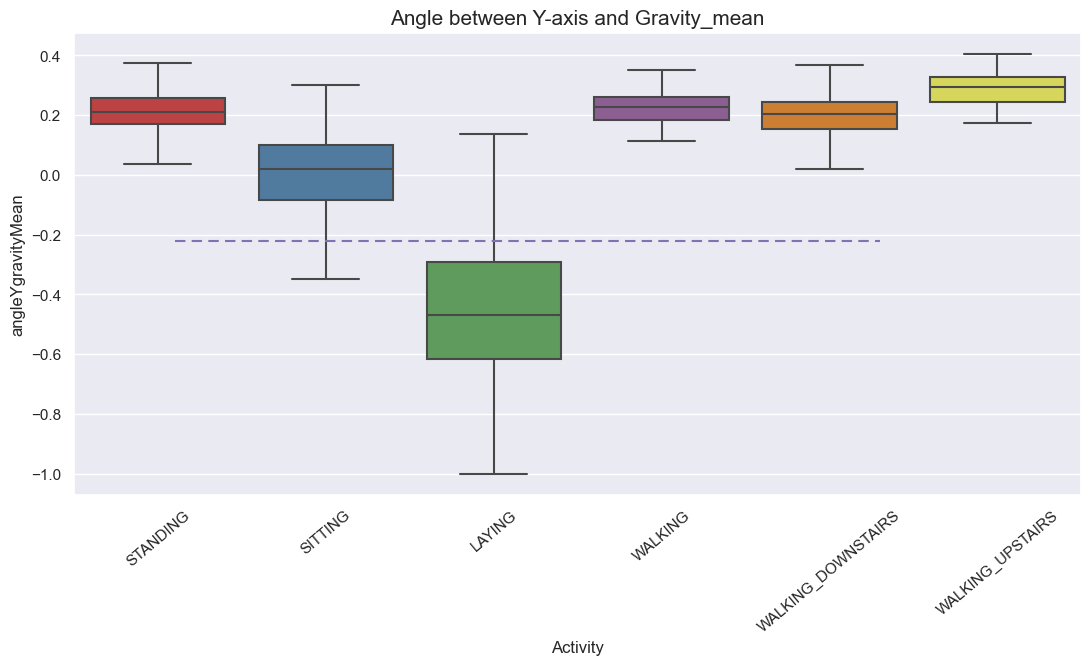

In [20]:
sns.boxplot(x='Activity', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

### Visualizations for feature distribution in space.

In [21]:
train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

##### Feature Columns : 0 - 10

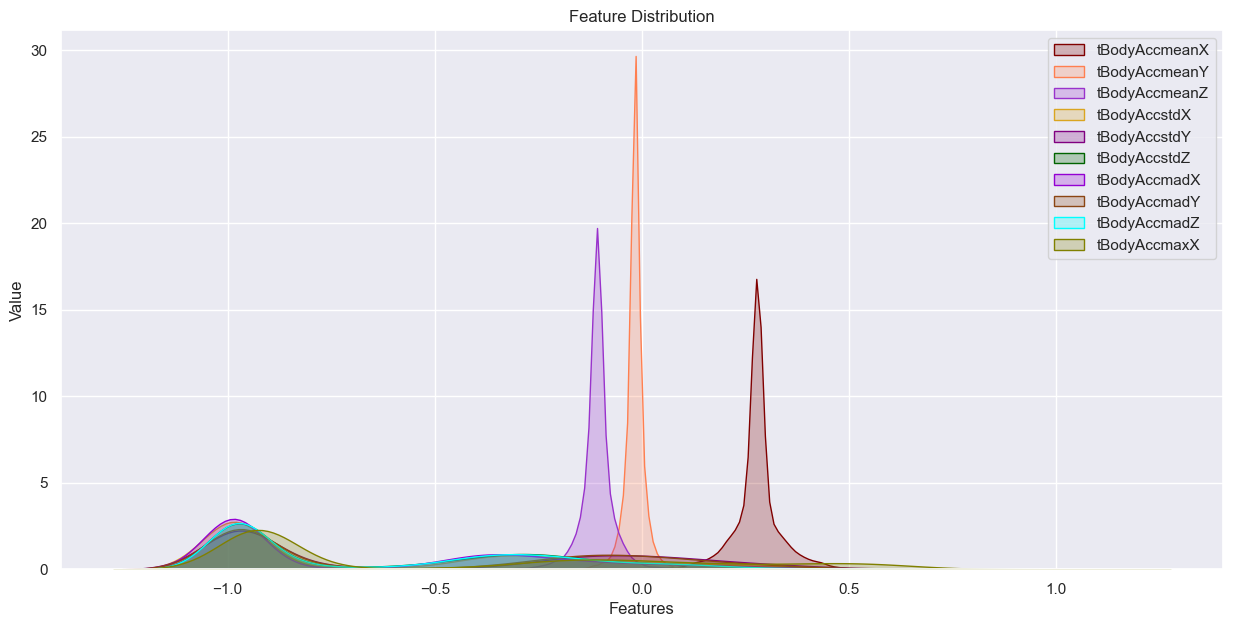

In [22]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[0:10]:
    index = index + 1
    fig = sns.kdeplot(train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.legend(train.columns[0:10])
plt.grid(True)
plt.show(fig)

##### Feature Columns : 10 - 20

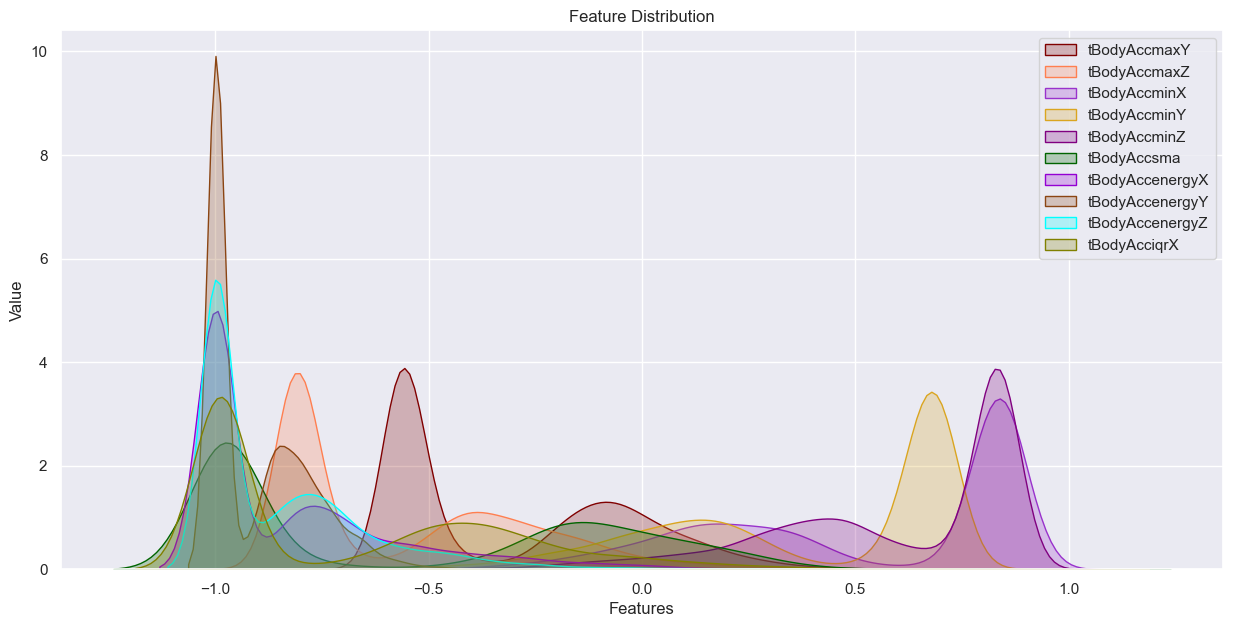

In [23]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[10:20]:
    index = index + 1
    ax1 = sns.kdeplot(train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.legend(train.columns[10:20])
plt.grid(True)
plt.show(fig)

##### Feature Columns : 20 - 30

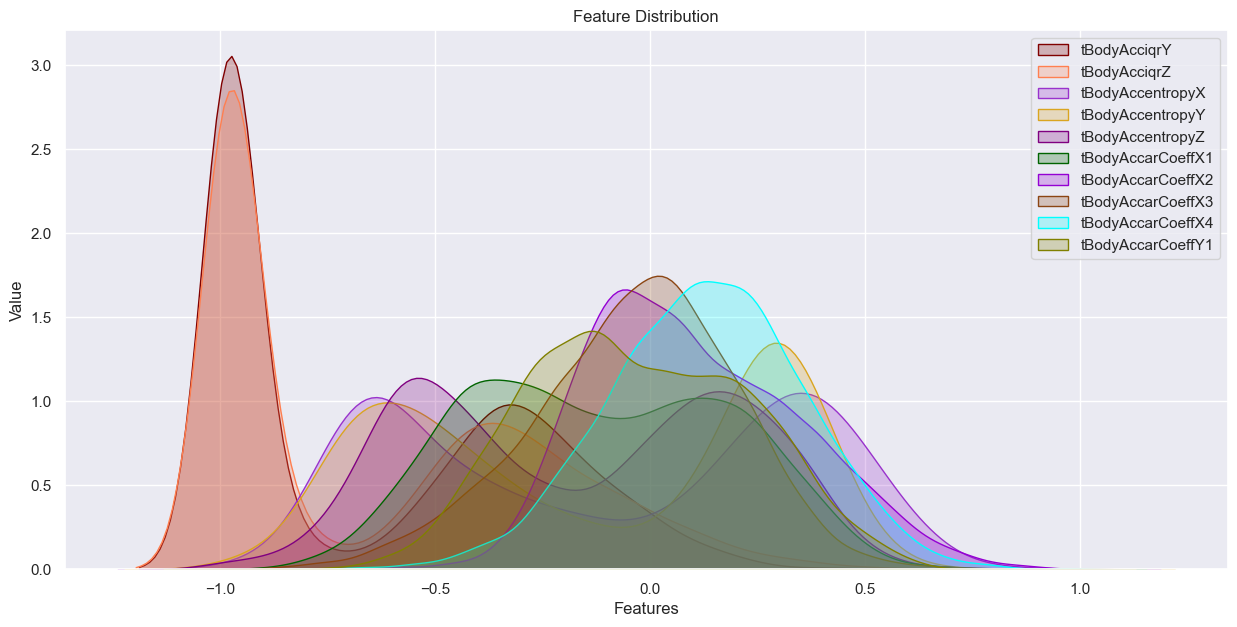

In [24]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[20:30]:
    index = index + 1
    ax1 = sns.kdeplot(train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.legend(train.columns[20:30])
plt.grid(True)
plt.show(fig)

##### Feature Columns : 30 - 40

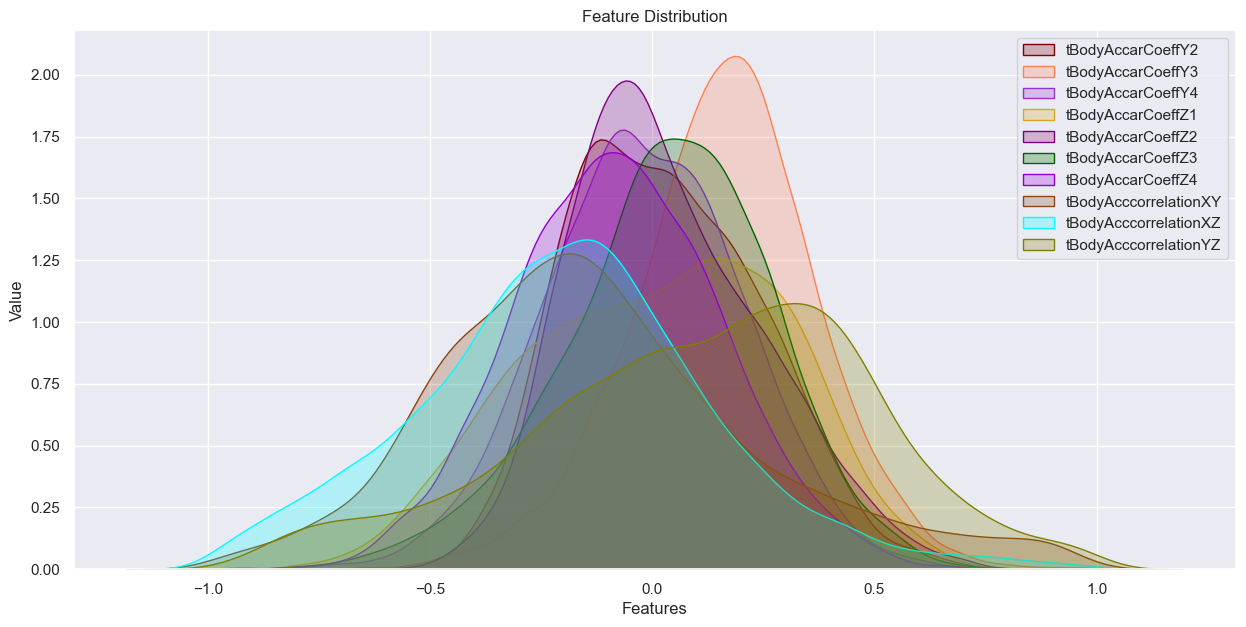

In [25]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[30:40]:
    index = index + 1
    ax1 = sns.kdeplot(train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.legend(train.columns[30:40])
plt.grid(True)
plt.show(fig)

##### Feature Columns : 40 - 50

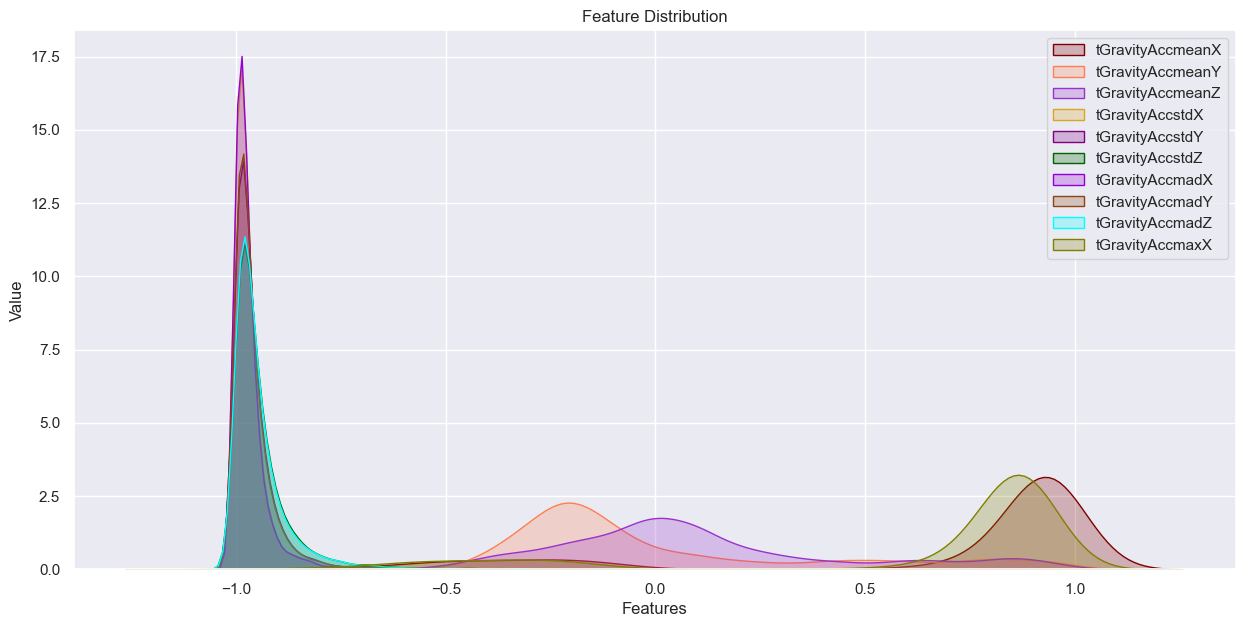

In [26]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[40:50]:
    index = index + 1
    ax1 = sns.kdeplot(train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.legend(train.columns[40:50])
plt.grid(True)
plt.show(fig)

### Visualizations with stripplot

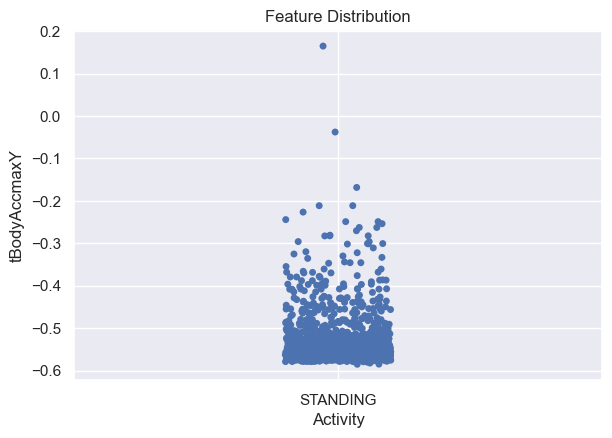

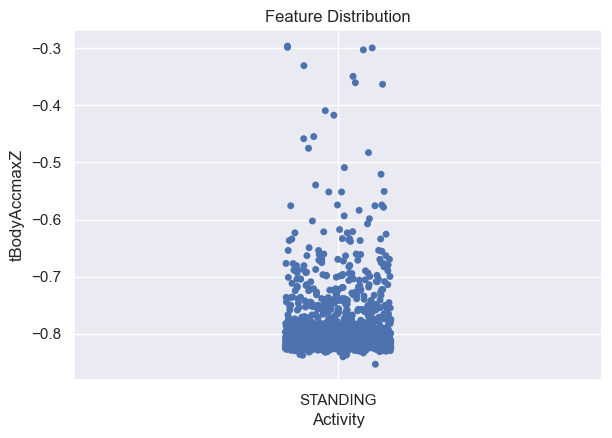

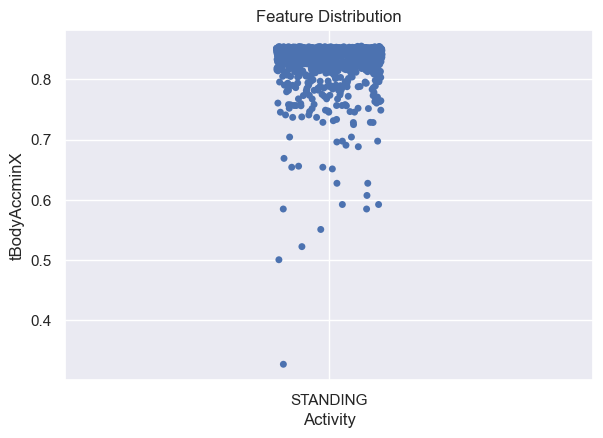

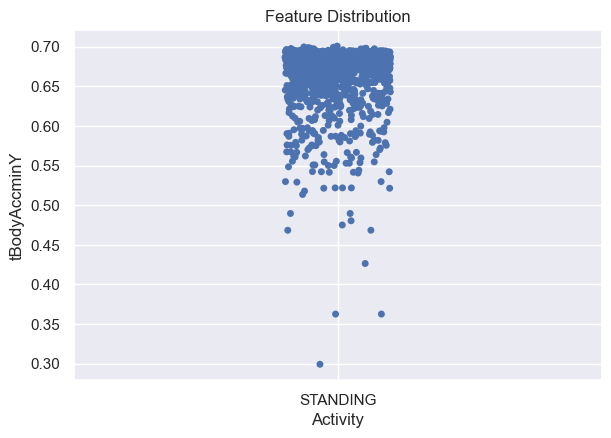

In [27]:
sns.set(rc={'figure.figsize':(15,10)})
plt.subplot(221)
fig1 = sns.stripplot(x='Activity', y= train.loc[train['Activity']=="STANDING"].iloc[:,10], data= train.loc[train['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig1)
plt.subplot(224)
fig2 = sns.stripplot(x='Activity', y=train.loc[train['Activity']=="STANDING"].iloc[:,11], data= train.loc[train['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)
plt.subplot(223)
fig2 = sns.stripplot(x='Activity', y= train.loc[train['Activity']=="STANDING"].iloc[:,12], data= train.loc[train['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)
plt.subplot(222)
fig2 = sns.stripplot(x='Activity', y= train.loc[train['Activity']=="STANDING"].iloc[:,13], data= train.loc[train['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)

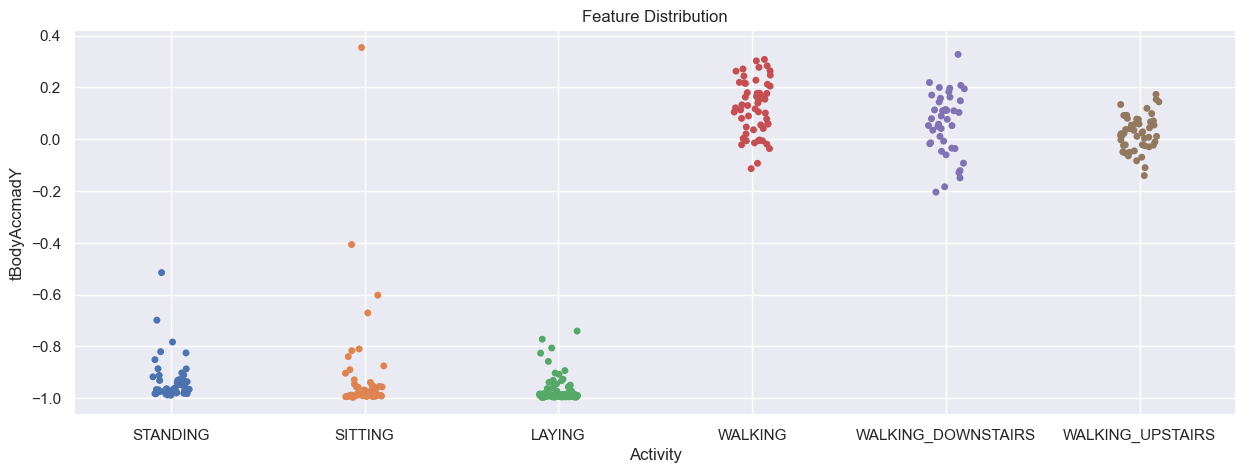

In [28]:
sns.set(rc={'figure.figsize':(15,5)})
fig1 = sns.stripplot(x='Activity', y= train.loc[train['subject']==15].iloc[:,7], data= train.loc[train['subject']==15], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig1)

###  Apply t-sne on the data 

In [29]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

##### Performing t-sne with different perplexity values and their repective plots..

In [30]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
       
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.010s...


C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7352 samples in 1.978s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.036s
[t-SNE] Iteration 50: error = 114.1303635, gradient norm = 0.0198372 (50 iterations in 2.108s)
[t-SNE] Iteration 100: error = 97.3466721, gradient norm = 0.0146564 (50 iterations in 1.566s)
[t-SNE] Iteration 150: error = 93.0183105, gradient norm = 0.0096584 (50 iterations in 1.492s)
[t-SNE] Iteration 200: error = 91.0886993, gradi

C:\Users\USER\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


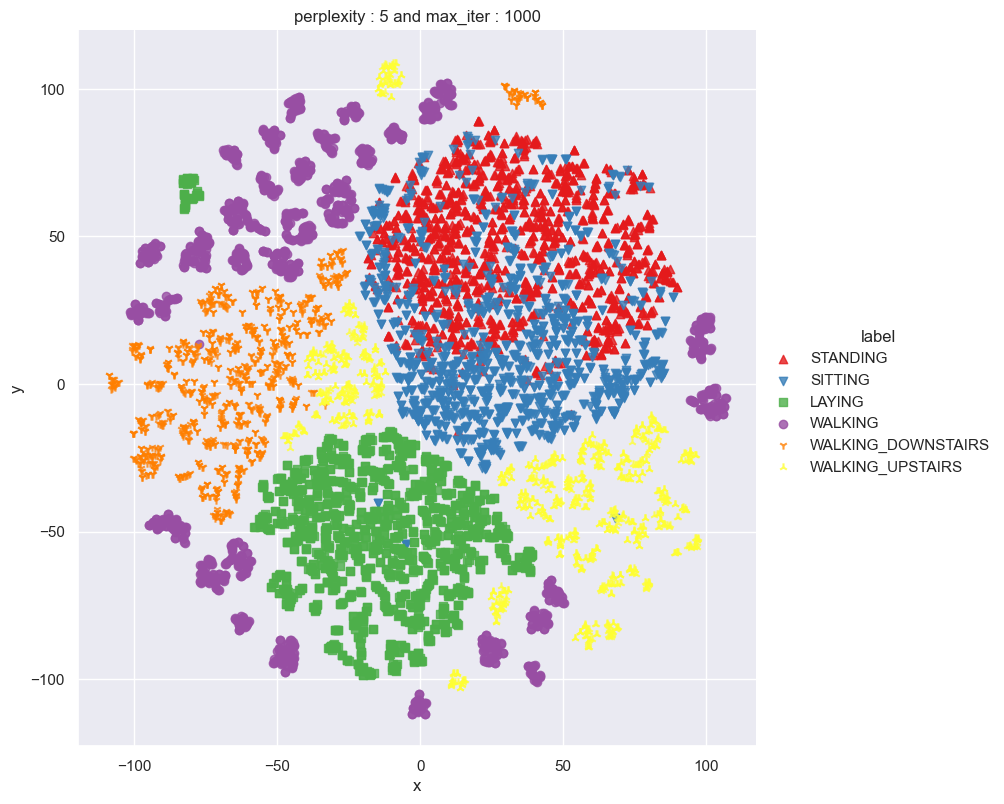

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...


C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7352 samples in 1.900s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.079s
[t-SNE] Iteration 50: error = 105.7932129, gradient norm = 0.0199592 (50 iterations in 1.941s)
[t-SNE] Iteration 100: error = 90.2913818, gradient norm = 0.0098392 (50 iterations in 1.583s)
[t-SNE] Iteration 150: error = 87.2289200, gradient norm = 0.0056153 (50 iterations in 1.427s)
[t-SNE] Iteration 200: error = 85.9789581, gradi

C:\Users\USER\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


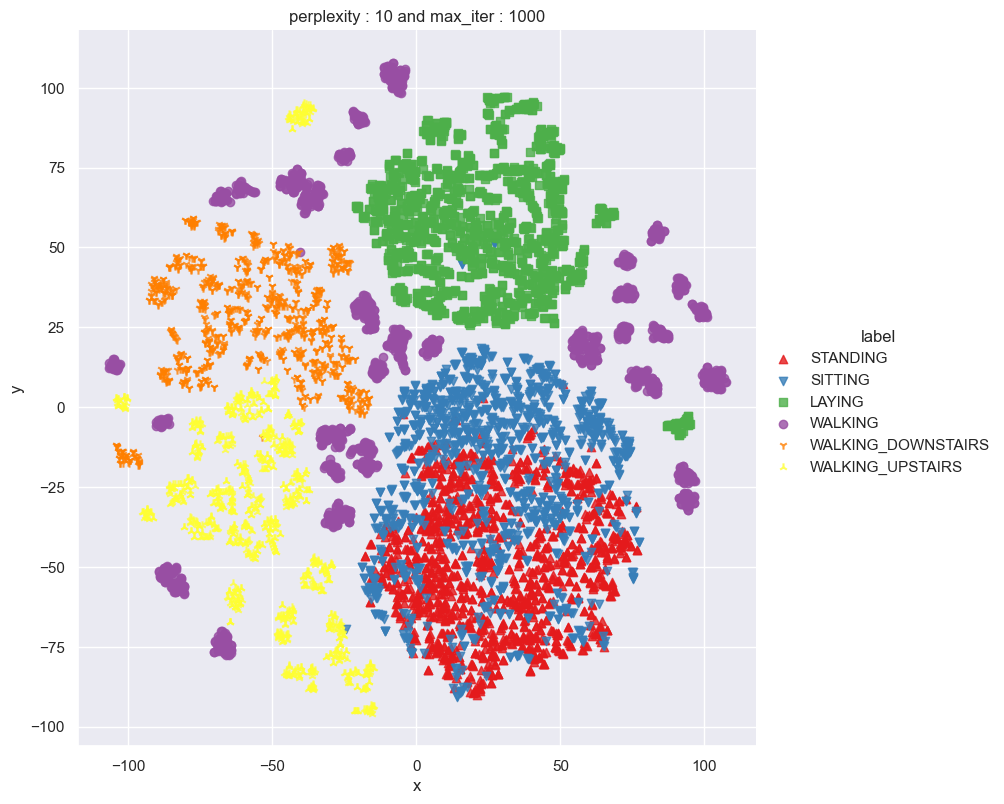

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.010s...


C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7352 samples in 1.702s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.133s
[t-SNE] Iteration 50: error = 97.3434372, gradient norm = 0.0215629 (50 iterations in 1.938s)
[t-SNE] Iteration 100: error = 84.2136917, gradient norm = 0.0070099 (50 iterations in 1.679s)
[t-SNE] Iteration 150: error = 82.1162262, gradient norm = 0.0034496 (50 iterations in 1.539s)
[t-SNE] Iteration 200: error = 81.2234955, gradie

C:\Users\USER\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


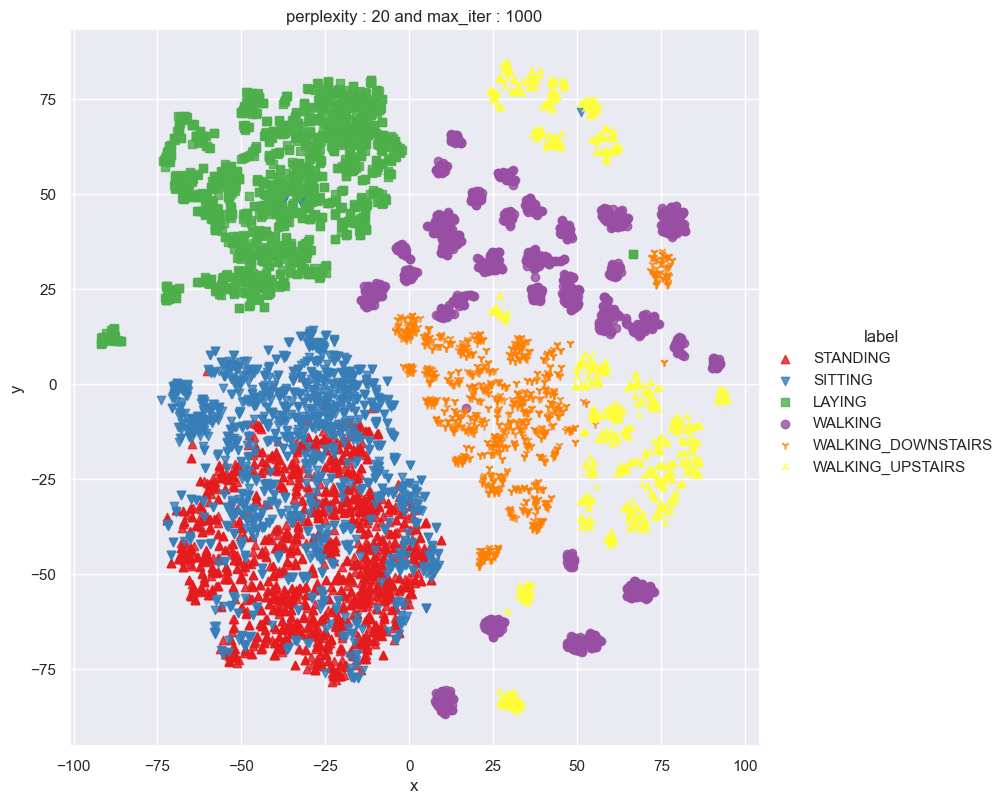

Done


In [31]:
X_pre_tsne = train.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[5,10,20])

##### Inference

- As we can see all the features except standing and sitting can be seperated very easily 

- Models will probably be confused between standing and sitting


In [32]:
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train.Activity

X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity

print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (7352, 561)
Test data size :  (2947, 561)


In [33]:
#  Useful labels for plotting confusion matrix
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

# Build ML Models

### Logistic Regression 

In [34]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
# Defining a function to run model

from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
   
    print('|      Accuracy      |')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('| Confusion Matrix |')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('| Classifiction Report |')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results  


def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('|      Best Estimator     |')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('|     Best parameters     |')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('|   No of CrossValidation sets   |')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('|        Best Score       |')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueErr

Done 
 

training_time(HH:MM:SS.ms) - 0:00:20.813926


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.015592


|      Accuracy      |

    0.9443501866304717


| Confusion Matrix |

 [[537   0   0   0   0   0]
 [  1 427  60   0   0   3]
 [  0  31 499   1   0   1]
 [  0   0   0 492   4   0]
 [  0   0   0  12 381  27]
 [  0   0   0  20   4 447]]


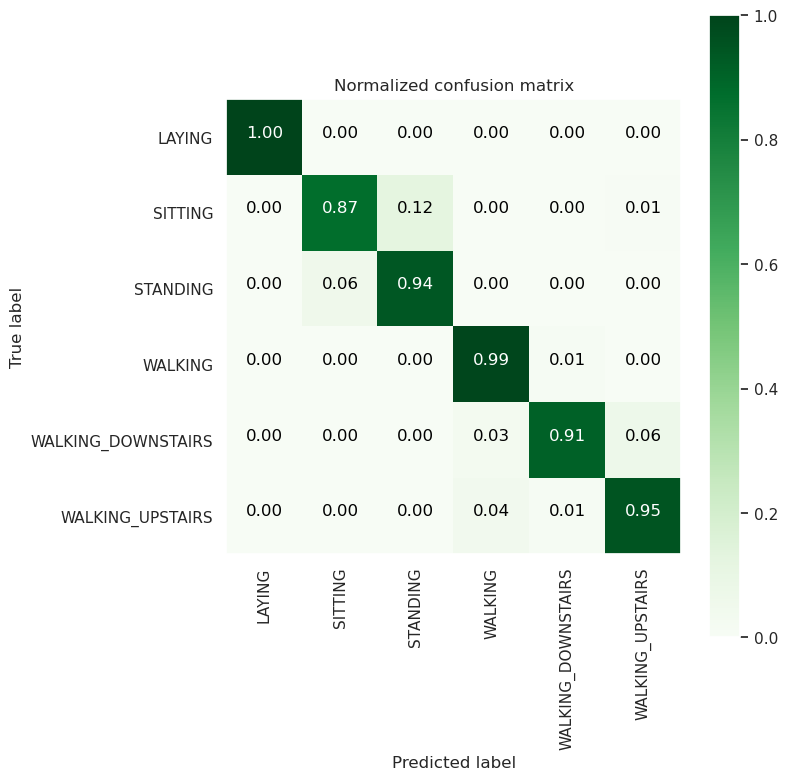

| Classifiction Report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.87      0.90       491
          STANDING       0.89      0.94      0.91       532
           WALKING       0.94      0.99      0.96       496
WALKING_DOWNSTAIRS       0.98      0.91      0.94       420
  WALKING_UPSTAIRS       0.94      0.95      0.94       471

          accuracy                           0.94      2947
         macro avg       0.95      0.94      0.94      2947
      weighted avg       0.95      0.94      0.94      2947



In [36]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [37]:
print_grid_search_attributes(log_reg_grid_results['model'])

|      Best Estimator     |

	LogisticRegression(C=0.01)

|     Best parameters     |
	Parameters of best estimator : 

	{'C': 0.01, 'penalty': 'l2'}

|   No of CrossValidation sets   |

	Total numbre of cross validation sets: 3

|        Best Score       |

	Average Cross Validate scores of best estimator : 

	0.9145824694626933



#### SVM

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_13736\2049569927.py:50: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


Done 
 

training_time(HH:MM:SS.ms) - 0:01:13.454137


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.010169


|      Accuracy      |

    0.9667458432304038


| Confusion Matrix |

 [[537   0   0   0   0   0]
 [  2 428  58   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


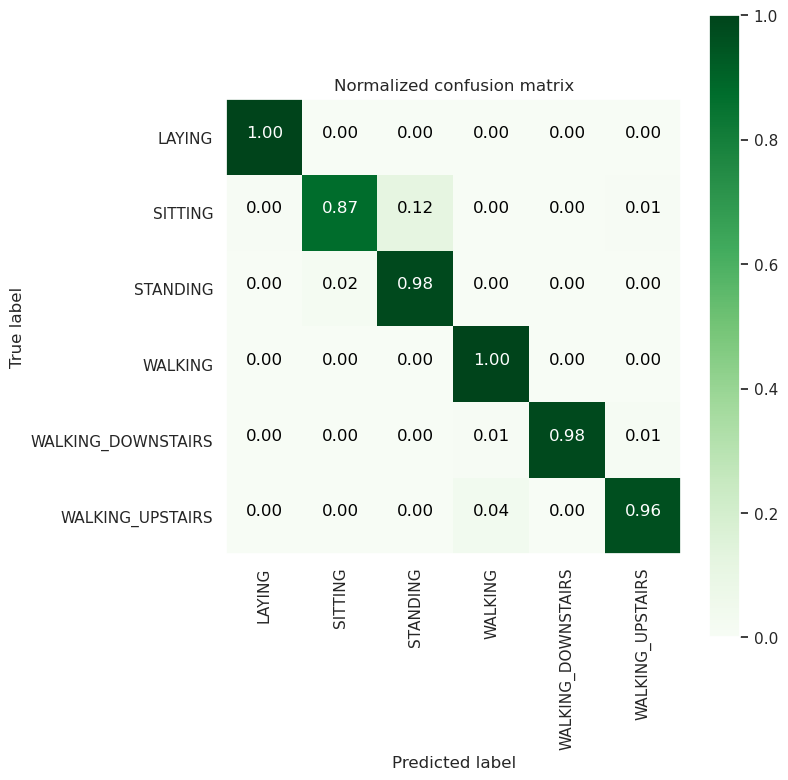

| Classifiction Report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [38]:
from sklearn.svm import LinearSVC

parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [39]:
print_grid_search_attributes(lr_svc_grid_results['model'])

|      Best Estimator     |

	LinearSVC(C=0.5, tol=5e-05)

|     Best parameters     |
	Parameters of best estimator : 

	{'C': 0.5}

|   No of CrossValidation sets   |

	Total numbre of cross validation sets: 5

|        Best Score       |

	Average Cross Validate scores of best estimator : 

	0.9419283471376314



####   DecisionTreeClassifier

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:08.705164


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.010165


|      Accuracy      |

    0.8642687478791992


| Confusion Matrix |

 [[537   0   0   0   0   0]
 [  0 386 105   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 472  16   8]
 [  0   0   0  15 344  61]
 [  0   0   0  78  24 369]]


C:\Users\USER\AppData\Local\Temp\ipykernel_13736\2049569927.py:50: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


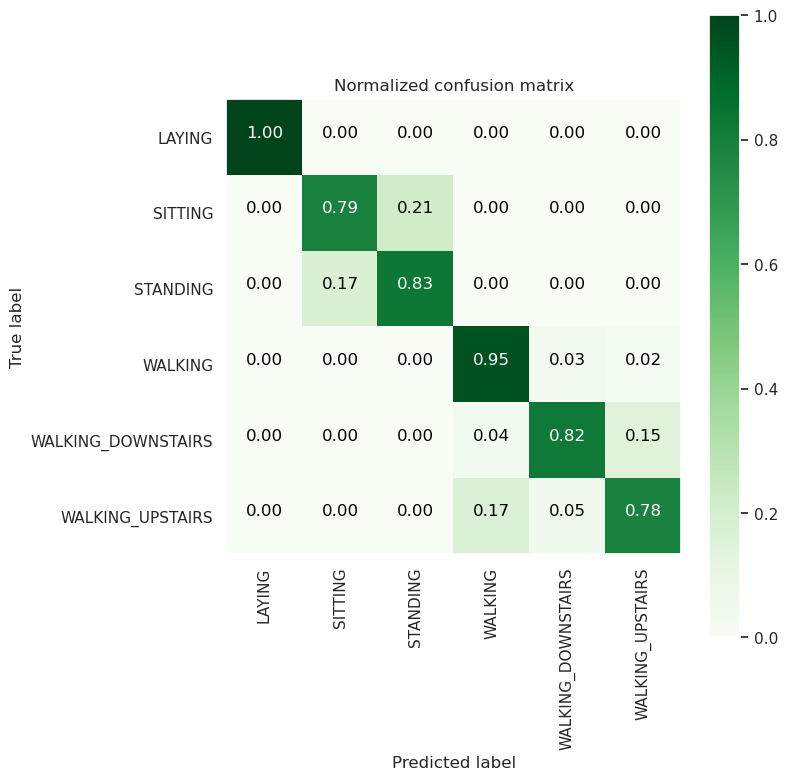

| Classifiction Report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.90      0.82      0.86       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.87      0.86      0.86      2947

|      Best Estimator     |

	DecisionTreeClassifier(max_depth=7)

|     Best parameters     |
	Parameters of best estimator : 

	{'max_depth': 7}

|   No of CrossValidation sets   |

	Total numbre of cross validation sets: 5

|        Best Score       |

	Average Cross Validate scores of best estimator : 

	0.8483463977025207



In [40]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

In [41]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%        {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 94.44%       5.565%
Linear SVC          : 96.67%       3.325% 
DecisionTree        : 86.43%        13.57% 


####   Ann

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train.iloc[:,0:562])
mat_train = scaler.transform(train.iloc[:,0:562])
print(mat_train)


scaler = MinMaxScaler()
scaler.fit(test.iloc[:,0:562])
mat_test = scaler.transform(test.iloc[:,0:562])
print(mat_test)



temp = []
for i in train.Activity:
    if i == "WALKING": temp.append(0)
    if i == "WALKING_UPSTAIRS": temp.append(1)
    if i == "WALKING_DOWNSTAIRS": temp.append(2)
    if i == "SITTING": temp.append(3)
    if i == "STANDING": temp.append(4)
    if i == "LAYING": temp.append(5)
train["n_Activity"] = temp

temp = []
for i in test.Activity:
    if i == "WALKING": temp.append(0)
    if i == "WALKING_UPSTAIRS": temp.append(1)
    if i == "WALKING_DOWNSTAIRS": temp.append(2)
    if i == "SITTING": temp.append(3)
    if i == "STANDING": temp.append(4)
    if i == "LAYING": temp.append(5)
test["n_Activity"] = temp


train.drop(["Activity"] , axis = 1 , inplace = True)
test.drop(["Activity"] , axis = 1 , inplace = True)

from keras.utils import to_categorical
y_train = to_categorical(train.n_Activity , num_classes=6)
y_test = to_categorical(test.n_Activity , num_classes=6)

X_train = mat_train 
X_test = mat_test

print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)


[[0.64429225 0.48985291 0.43354743 ... 0.79825103 0.47068654 0.        ]
 [0.63920942 0.49179472 0.4382399  ... 0.79848665 0.47284164 0.        ]
 [0.63982653 0.49026642 0.44326915 ... 0.79872236 0.47544109 0.        ]
 ...
 [0.63669369 0.49149469 0.47748909 ... 0.84506893 0.52040559 1.        ]
 [0.64482708 0.49057848 0.42085971 ... 0.84323381 0.51266974 1.        ]
 [0.67575173 0.49378844 0.39806642 ... 0.84348837 0.51834742 1.        ]]
[[0.6718788  0.55764282 0.52464834 ... 0.62209457 0.46362736 0.        ]
 [0.69470427 0.57426358 0.42707858 ... 0.62446791 0.45014396 0.        ]
 [0.68636345 0.55310221 0.42794829 ... 0.62380956 0.45251181 0.        ]
 ...
 [0.74529355 0.64526771 0.43015674 ... 0.62088108 0.58803909 1.        ]
 [0.65638384 0.62620241 0.44817885 ... 0.61581385 0.59135763 1.        ]
 [0.58994885 0.56560474 0.41032069 ... 0.61537208 0.59163879 1.        ]]
(7352, 562) (7352, 6)
(2947, 562) (2947, 6)


In [43]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_
explained_variance


array([6.15828106e-01, 5.06400451e-02, 4.26434706e-02, 1.86262004e-02,
       1.66035347e-02, 1.24953315e-02, 1.16965425e-02, 1.08678969e-02,
       9.83433293e-03, 8.50657174e-03, 8.37001183e-03, 7.05127957e-03,
       6.70338404e-03, 5.99328732e-03, 5.41181394e-03, 4.88930458e-03,
       4.73761525e-03, 4.55982869e-03, 4.23964053e-03, 4.11226497e-03,
       4.09249242e-03, 3.86897287e-03, 3.70602160e-03, 3.53225460e-03,
       3.41733672e-03, 3.24938911e-03, 3.10949303e-03, 3.04379473e-03,
       2.98265122e-03, 2.88530149e-03, 2.80394457e-03, 2.70513498e-03,
       2.62673924e-03, 2.56092694e-03, 2.38739329e-03, 2.37354154e-03,
       2.25141457e-03, 2.17735852e-03, 2.08401681e-03, 2.06161176e-03,
       2.03456493e-03, 1.96339691e-03, 1.91427414e-03, 1.81388346e-03,
       1.77166464e-03, 1.70712611e-03, 1.67952873e-03, 1.61571929e-03,
       1.58378870e-03, 1.55410378e-03, 1.50763285e-03, 1.44365153e-03,
       1.40415069e-03, 1.36628463e-03, 1.32540485e-03, 1.27087175e-03,
      

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.0005),loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                36032     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 196)               25284     
                                                                 
 dense_4 (Dense)             (None, 32)                6304      
                                                        

C:\Users\USER\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [45]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,y_train,batch_size=12,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
613/613 [==============================] - 2s 2ms/step - loss: 0.2203 - accuracy: 0.9238 - val_loss: 0.6120 - val_accuracy: 0.8212
Epoch 2/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9736 - val_loss: 0.6546 - val_accuracy: 0.8164
Epoch 3/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0506 - accuracy: 0.9830 - val_loss: 0.7573 - val_accuracy: 0.8297
Epoch 4/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0325 - accuracy: 0.9884 - val_loss: 0.8513 - val_accuracy: 0.8140
Epoch 5/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0368 - accuracy: 0.9895 - val_loss: 1.2184 - val_accuracy: 0.7801
Epoch 6/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0302 - accuracy: 0.9909 - val_loss: 1.6291 - val_accuracy: 0.7214
Epoch 7/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.7270 - val_accuracy: 0.8639
Epoch 

In [46]:
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

93/93 [==============================] - 0s 1ms/step


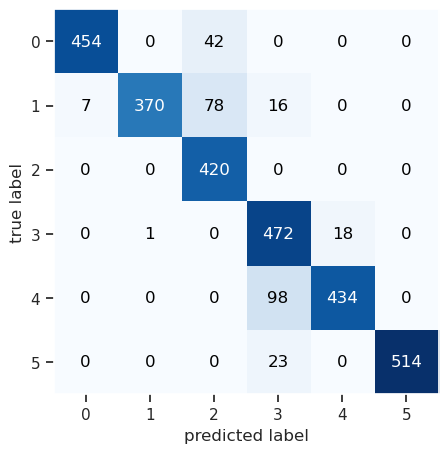

In [47]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10, 5))
plt.show()


In [48]:
from sklearn.metrics import classification_report , accuracy_score
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       496
           1       1.00      0.79      0.88       471
           2       0.78      1.00      0.88       420
           3       0.78      0.96      0.86       491
           4       0.96      0.82      0.88       532
           5       1.00      0.96      0.98       537

    accuracy                           0.90      2947
   macro avg       0.92      0.91      0.90      2947
weighted avg       0.92      0.90      0.91      2947

